# **Predicting Customer Computer Brand Preference Using Survey Data**

## Step 1: Define the Problem

### Title: Predicting Customer Computer Brand Preference Using Survey Data

### Business Context:
The sales team wants to understand which computer brand (Acer or Sony) customers prefer. Some survey responses for brand preference were missing, and the sales team needs a predictive model to fill in the gaps and guide strategic decisions.

### Objective:
Build a classification model to predict the preferred computer brand using customer survey data (salary, age, education, car make, region, available credit). Compare multiple models to identify the most accurate one.

### Key Questions:

Which customer features are most predictive of brand preference?

Can we accurately predict brand preference for respondents with missing survey answers?

Which machine learning model performs best for this dataset?

### Datasets:

Training set: CompleteResponses.csv (~9,898 fully answered surveys)

Test set: SurveyIncomplete.csv (responses with missing brand preference)

Survey key: Mapping of feature codes to actual values

## Step 2: Data Description

In [1]:
import pandas as pd

# Load the training dataset
df = pd.read_csv('CompleteResponses.csv')

# Inspect the first few rows
df.head()

# Check dataset info and summary statistics
df.info()
df.describe()

# Check for missing values
df.isnull().sum()

# Unique values for categorical columns
for col in ['elevel', 'car', 'zipcode', 'brand']:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9898 entries, 0 to 9897
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   9898 non-null   float64
 1   age      9898 non-null   int64  
 2   elevel   9898 non-null   int64  
 3   car      9898 non-null   int64  
 4   zipcode  9898 non-null   int64  
 5   credit   9898 non-null   float64
 6   brand    9898 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 541.4 KB
elevel: [0 1 3 4 2]
car: [14 11 15  6  8  3 17  5 16 20 13  7  2 18  9  4  1 10 12 19]
zipcode: [4 6 2 5 3 0 7 8 1]
brand: [0 1]


### Dataset Overview:

Observations: 9,898

Variables: 7

| Column  | Data Type | Notes                                         |
| ------- | --------- | --------------------------------------------- |
| salary  | float64   | Customer-reported yearly salary               |
| age     | int64     | Customer age                                  |
| elevel  | int64     | Education level (integer codes)               |
| car     | int64     | Make of primary car (integer codes)           |
| zipcode | int64     | Region code based on zip code (integer codes) |
| credit  | float64   | Amount of available credit                    |
| brand   | int64     | Brand preference (integer codes)              |


Missing Values: None

Categorical Columns (integer codes):

elevel: [0, 1, 2, 3, 4]

car: [1–20]

zipcode: [0–8]

brand: [0, 1]

## Step 3: Data Preprocessing & Mapping

### Objective: Clean the dataset and prepare it for modeling.

### 3.1 Mapping Categorical Variables:

In [2]:
# Education mapping
education_map = {
    0: "Less than High School",
    1: "High School",
    2: "Some College",
    3: "4-Year College",
    4: "Master's, Doctoral or Professional Degree"
}
df['elevel_label'] = df['elevel'].map(education_map)

# Region mapping
region_map = {
    0: "New England", 1: "Mid-Atlantic", 2: "East North Central",
    3: "West North Central", 4: "South Atlantic", 5: "East South Central",
    6: "West South Central", 7: "Mountain", 8: "Pacific"
}
df['region'] = df['zipcode'].map(region_map)


### Note:

Tree-based models (Decision Tree, Random Forest) can use numeric codes directly.

Logistic Regression will require one-hot encoding for categorical variables.

### 3.2 Data Verification:

In [3]:
df.dtypes
df.isnull().sum()

salary          0
age             0
elevel          0
car             0
zipcode         0
credit          0
brand           0
elevel_label    0
region          0
dtype: int64

## Step 4: Exploratory Data Analysis (EDA)

### Objective: Understand patterns, distributions, and relationships.

### 4.1 Distribution of Target Variable:

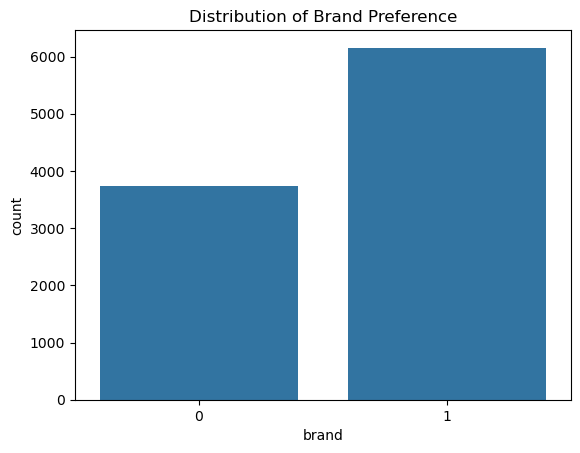

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='brand', data=df)
plt.title("Distribution of Brand Preference")
plt.show()

### 4.2 Numeric Features Distribution:

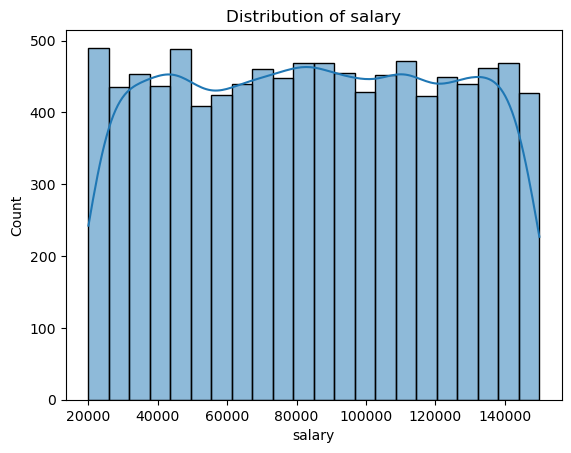

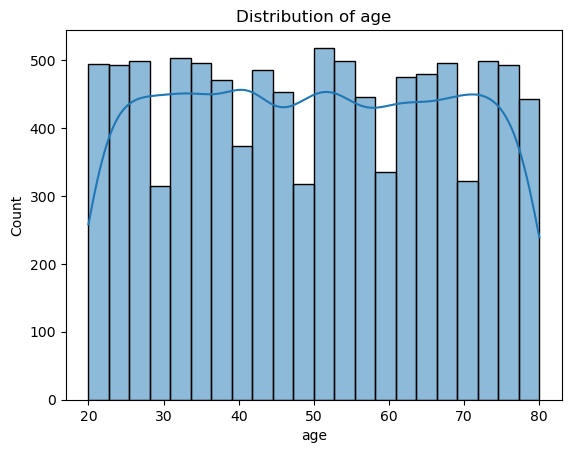

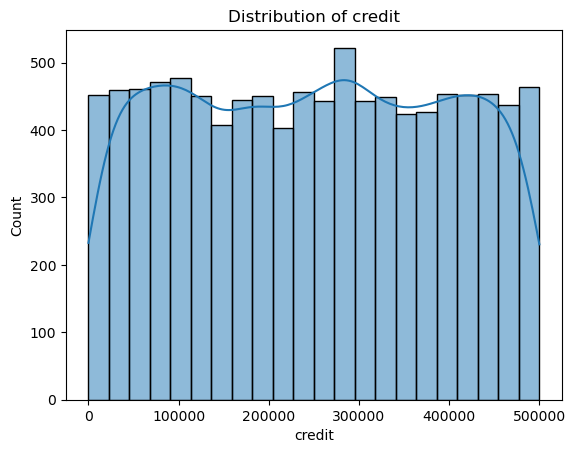

In [5]:
numeric_cols = ['salary', 'age', 'credit']
for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### 4.3 Feature vs Target Relationship:

[Text(0.5, 1.0, 'Salary by Brand')]

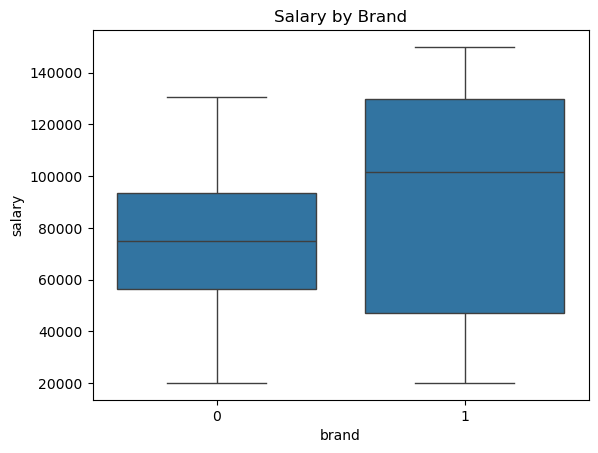

In [7]:
sns.boxplot(x='brand', y='salary', data=df).set(title="Salary by Brand")

[Text(0.5, 1.0, 'Age by Brand')]

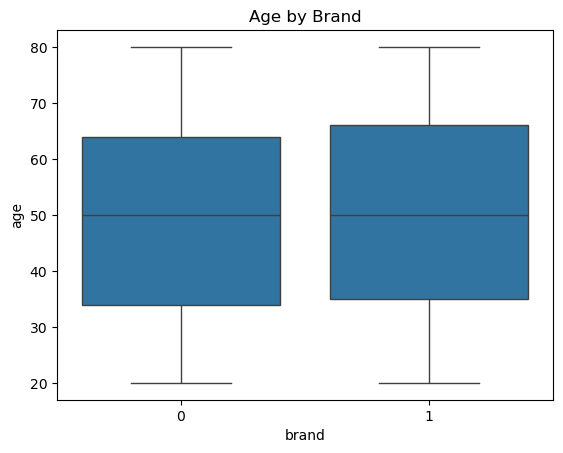

In [8]:
sns.boxplot(x='brand', y='age', data=df).set(title="Age by Brand")

[Text(0.5, 1.0, 'Credit by Brand')]

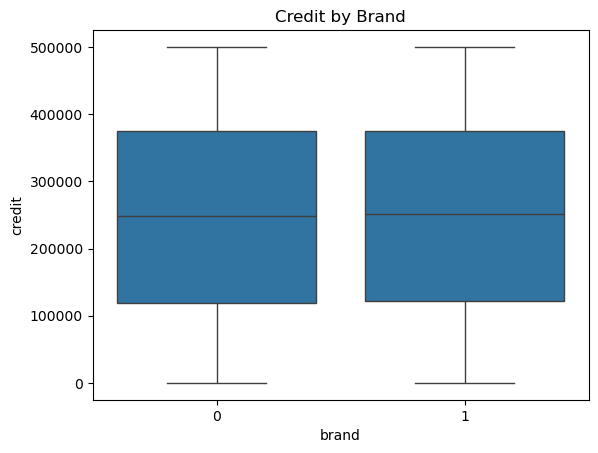

In [9]:
sns.boxplot(x='brand', y='credit', data=df).set(title="Credit by Brand")

### 4.4 Correlation Analysis (Numeric Features Only):

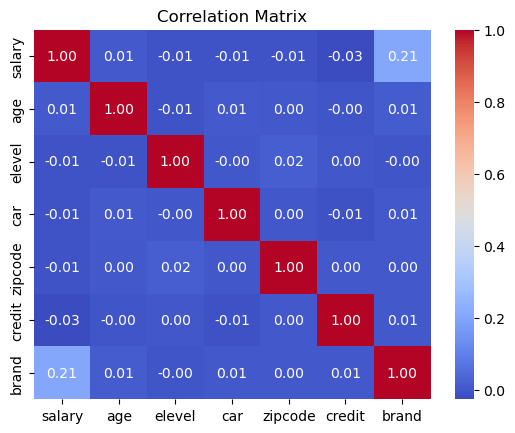

In [10]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 4.5 Categorical Feature Visualization:

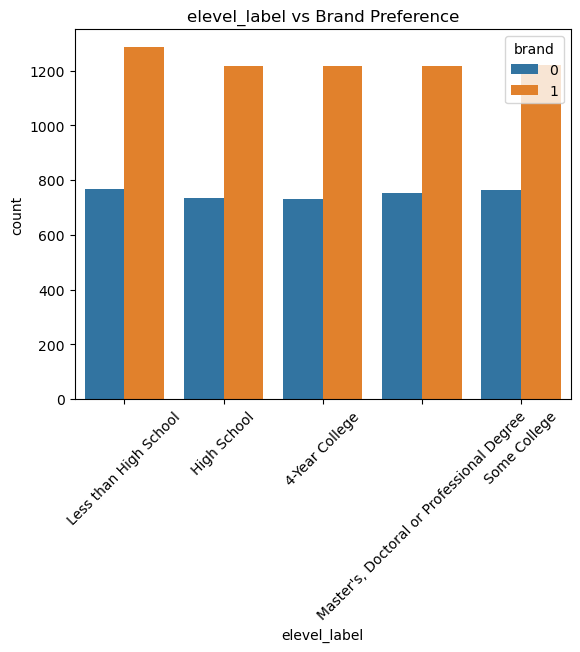

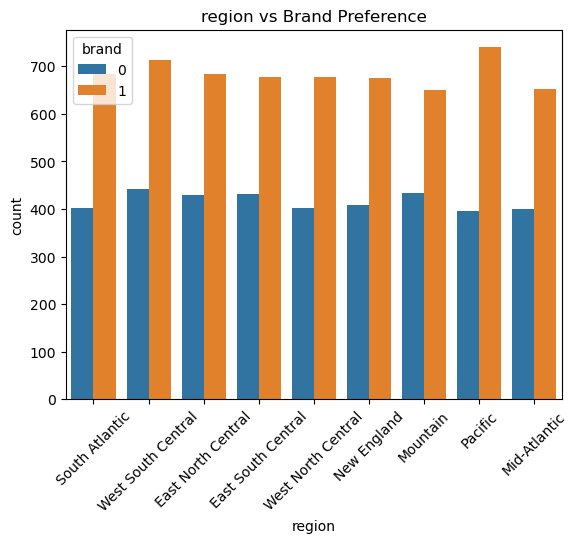

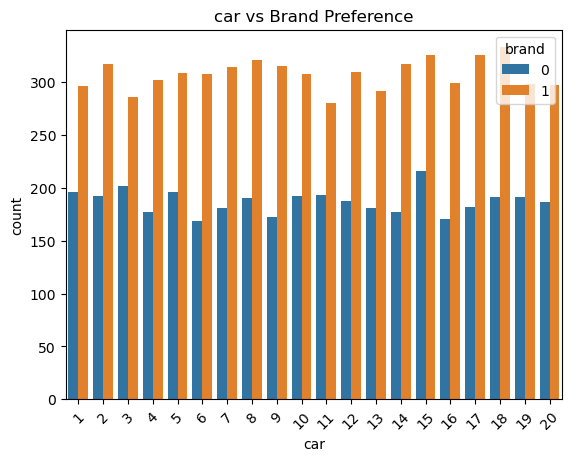

In [11]:
categorical_cols = ['elevel_label', 'region', 'car']
for col in categorical_cols:
    sns.countplot(x=col, hue='brand', data=df)
    plt.title(f'{col} vs Brand Preference')
    plt.xticks(rotation=45)
    plt.show()

## Step 5: Feature Selection & Encoding

### Features Identified for Modeling:

salary, age, elevel_label, car, region, credit

### Encoding for Logistic Regression:

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['elevel_encoded'] = le.fit_transform(df['elevel_label'])
df['region_encoded'] = le.fit_transform(df['region'])

# Final feature set
X = df[['salary', 'age', 'elevel_encoded', 'car', 'region_encoded', 'credit']]
y = df['brand']

### Feature Importance Check:

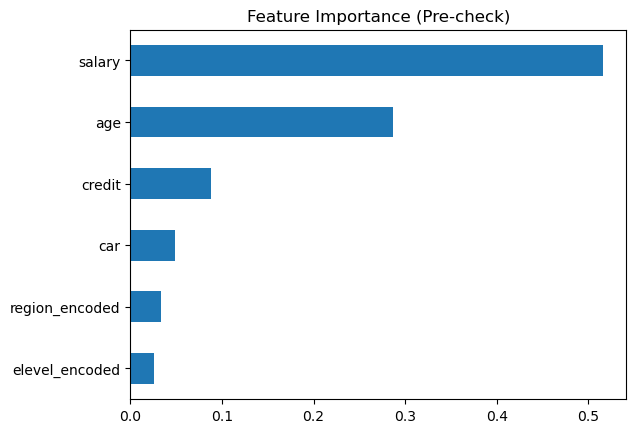

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_precheck = RandomForestClassifier(random_state=42)
rf_precheck.fit(X, y)
importances = pd.Series(rf_precheck.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance (Pre-check)')
plt.show()

## Step 6: Model Training & Evaluation

### Models Trained:

Logistic Regression

Decision Tree

Random Forest

### 6.1 Train-Test Split:

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 6.2 Model Initialization & Training:

                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.920707   0.935877  0.936637  0.936257
1        Decision Tree  0.902020   0.911182  0.933387  0.922151
0  Logistic Regression  0.542424   0.594974  0.826970  0.692046


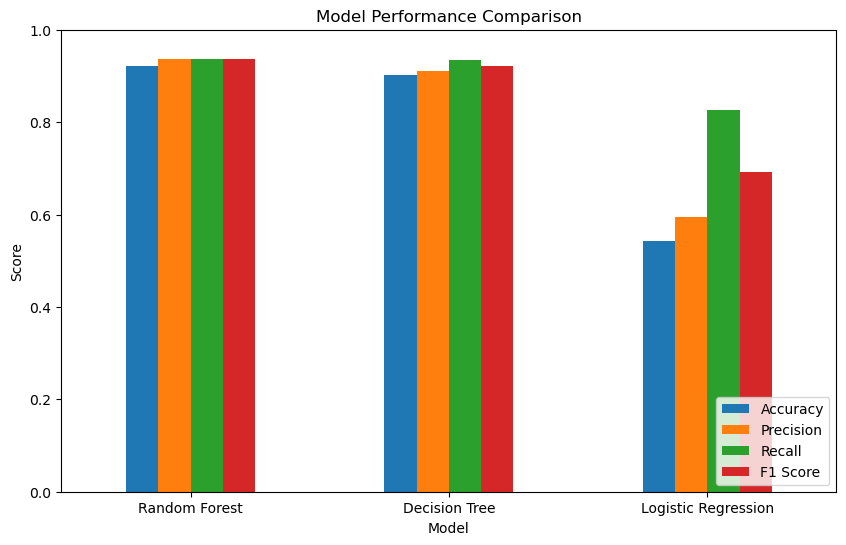

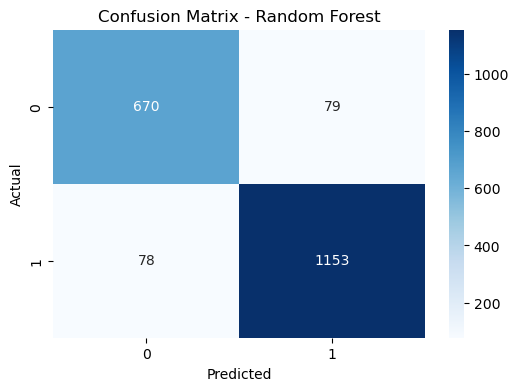

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       749
           1       0.94      0.94      0.94      1231

    accuracy                           0.92      1980
   macro avg       0.92      0.92      0.92      1980
weighted avg       0.92      0.92      0.92      1980



In [18]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Train, predict, and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Collect metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)
print(results_df)

# Optional: Bar plot for visual comparison
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(10,6)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix of the best model
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
print(f"Classification Report for {best_model_name}:\n")
print(classification_report(y_test, y_pred_best))


### 6.3 Model Performance:

Random Forest outperforms other models.

Confusion matrix and classification report visualized to confirm performance.

## Step 7: Model Validation & Full Dataset Retraining

### 7.1 Retraining on Full Dataset:

Validation Accuracy on Full Dataset: 100.00%

Predicted distribution:
Predicted
1    0.621742
0    0.378258
Name: proportion, dtype: float64

Actual distribution:
Actual
1    0.621742
0    0.378258
Name: proportion, dtype: float64


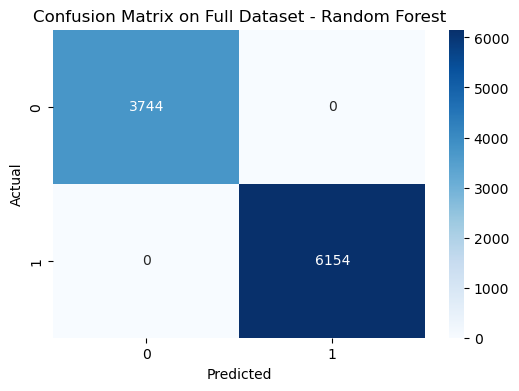

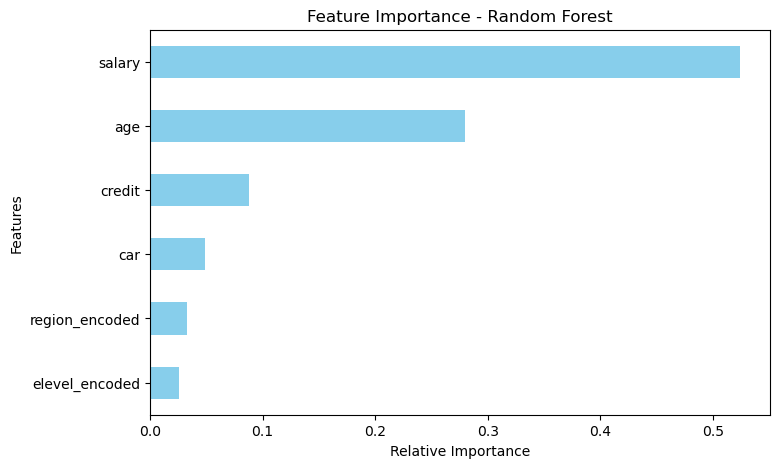

In [20]:
# Step 7: Validate the Best Model on the Full Dataset

# Refit the best model (already trained on X_train) on the full dataset
best_model.fit(X, y)

# Predict on the full dataset
y_pred_full = best_model.predict(X)

# Compute accuracy
full_accuracy = accuracy_score(y, y_pred_full)
print(f"Validation Accuracy on Full Dataset: {full_accuracy:.2%}")

# Compare predicted vs actual distributions
comparison = pd.DataFrame({
    "Actual": y,
    "Predicted": y_pred_full
})

print("\nPredicted distribution:")
print(comparison["Predicted"].value_counts(normalize=True))
print("\nActual distribution:")
print(comparison["Actual"].value_counts(normalize=True))

# Confusion matrix on full dataset
cm_full = confusion_matrix(y, y_pred_full)
plt.figure(figsize=(6,4))
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix on Full Dataset - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (if tree-based)
if best_model_name in ["Decision Tree", "Random Forest"]:
    importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=True)
    plt.figure(figsize=(8,5))
    importances.plot(kind='barh', color='skyblue')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.show()


### Explanation of 92% vs 100% Accuracy:

92%: Measured on unseen test set (80/20 split) → generalization power.

100%: Measured on the full dataset after retraining → model memorizes training data (expected for tree-based models).

## Step 9: Predicting Brand Preference for the Incomplete Survey
### 9.1 Objective
Apply the best-performing model (Random Forest) to the incomplete survey dataset to predict the preferred computer brand for respondents with missing brand values.

### 9.2 Load and Inspect the Incomplete Survey

In [22]:
import pandas as pd

# Load incomplete survey dataset
incomplete = pd.read_csv("SurveyIncomplete.csv")

# Inspect first rows and data types
print(incomplete.head())
print(incomplete.info())


         salary  age  elevel  car  zipcode       credit  brand
0  150000.00000   76       1    3        3  377980.1016      1
1   82523.83897   51       1    8        3  141657.6066      0
2  115646.63620   34       0   10        2  360980.3585      1
3  141443.39330   22       3   18        2  282736.3191      1
4  149211.27030   56       0    5        3  215667.2896      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   salary   5000 non-null   float64
 1   age      5000 non-null   int64  
 2   elevel   5000 non-null   int64  
 3   car      5000 non-null   int64  
 4   zipcode  5000 non-null   int64  
 5   credit   5000 non-null   float64
 6   brand    5000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 273.6 KB
None


### 9.3 Apply Feature Mapping and Encoding

### Education (elevel) mapping:

In [23]:
education_map = {
    0: "Less than High School",
    1: "High School",
    2: "Some College",
    3: "4-Year College",
    4: "Master's, Doctoral or Professional Degree"
}
incomplete['elevel_label'] = incomplete['elevel'].map(education_map)

### Zip code mapping to region:

In [24]:
region_map = {
    0: "New England",
    1: "Mid-Atlantic",
    2: "East North Central",
    3: "West North Central",
    4: "South Atlantic",
    5: "East South Central",
    6: "West South Central",
    7: "Mountain",
    8: "Pacific"
}
incomplete['region'] = incomplete['zipcode'].map(region_map)


### Label encoding for categorical features (must match the training encoding):

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder_edu = LabelEncoder()
label_encoder_region = LabelEncoder()

incomplete['elevel_encoded'] = label_encoder_edu.fit_transform(incomplete['elevel_label'])
incomplete['region_encoded'] = label_encoder_region.fit_transform(incomplete['region'])


### 9.4 Prepare Feature Set

In [26]:
X_incomplete = incomplete[['salary', 'age', 'elevel_encoded', 'car', 'region_encoded', 'credit']]


### 9.5 Apply the Trained Model

In [27]:
# Use the best-trained Random Forest model
predicted_brand = best_model.predict(X_incomplete)

# Add predictions to the incomplete dataframe
incomplete['predicted_brand'] = predicted_brand

# Inspect results
print(incomplete[['salary', 'age', 'elevel_label', 'car', 'region', 'credit', 'predicted_brand']].head())


         salary  age           elevel_label  car              region  \
0  150000.00000   76            High School    3  West North Central   
1   82523.83897   51            High School    8  West North Central   
2  115646.63620   34  Less than High School   10  East North Central   
3  141443.39330   22         4-Year College   18  East North Central   
4  149211.27030   56  Less than High School    5  West North Central   

        credit  predicted_brand  
0  377980.1016                1  
1  141657.6066                0  
2  360980.3585                1  
3  282736.3191                1  
4  215667.2896                1  


### 9.6 Export Predictions

In [28]:
# Save predictions to CSV for business use
incomplete.to_csv("SurveyIncomplete_Predictions.csv", index=False)


## Step 10: Reporting & Visualizing Predictions
### 10.1 Objective
Provide a comprehensive view of predicted brand preferences from the incomplete survey. Use tables, charts, and visualizations to communicate insights clearly to the sales team.

Highlight the distribution of predicted brands.

Identify key patterns across demographics, education, region, and other features.

Present results in a dashboard-ready format.

### 10.2 Distribution of Predicted Brand

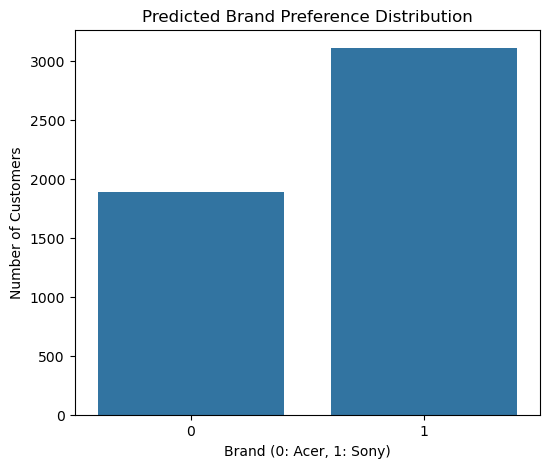

Predicted Brand Distribution (%):
predicted_brand
1    62.16
0    37.84
Name: proportion, dtype: float64


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for predicted brand
plt.figure(figsize=(6,5))
sns.countplot(x='predicted_brand', data=incomplete)
plt.title("Predicted Brand Preference Distribution")
plt.xlabel("Brand (0: Acer, 1: Sony)")
plt.ylabel("Number of Customers")
plt.show()

# Percentage distribution
brand_counts = incomplete['predicted_brand'].value_counts(normalize=True) * 100
print("Predicted Brand Distribution (%):")
print(brand_counts)


### 10.3 Relationship with Key Features
These visualizations provide actionable insights, showing which demographic segments are likely to prefer each brand.
### Salary vs. Predicted Brand

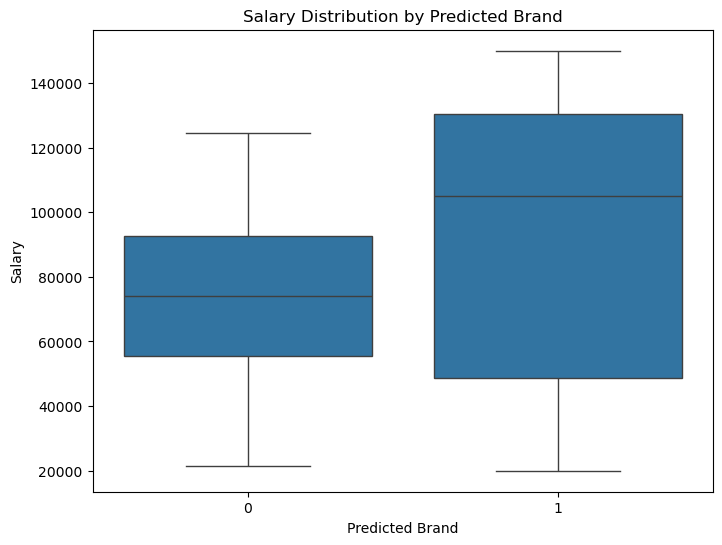

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(x='predicted_brand', y='salary', data=incomplete)
plt.title("Salary Distribution by Predicted Brand")
plt.xlabel("Predicted Brand")
plt.ylabel("Salary")
plt.show()


### Age vs. Predicted Brand

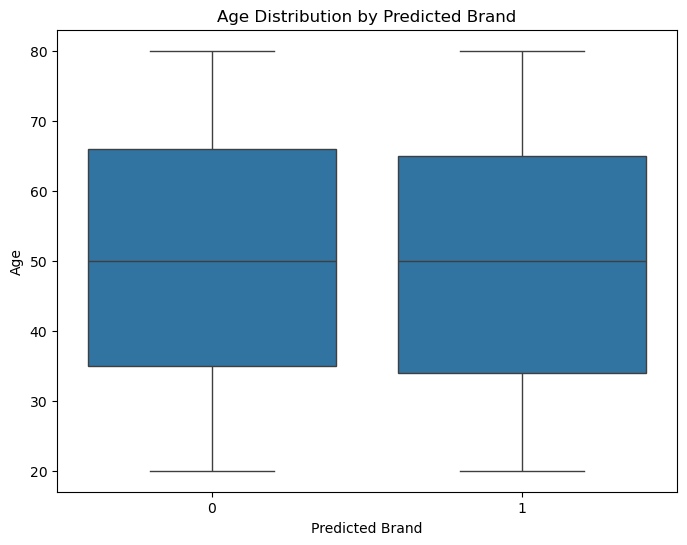

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='predicted_brand', y='age', data=incomplete)
plt.title("Age Distribution by Predicted Brand")
plt.xlabel("Predicted Brand")
plt.ylabel("Age")
plt.show()


### Region vs. Predicted Brand

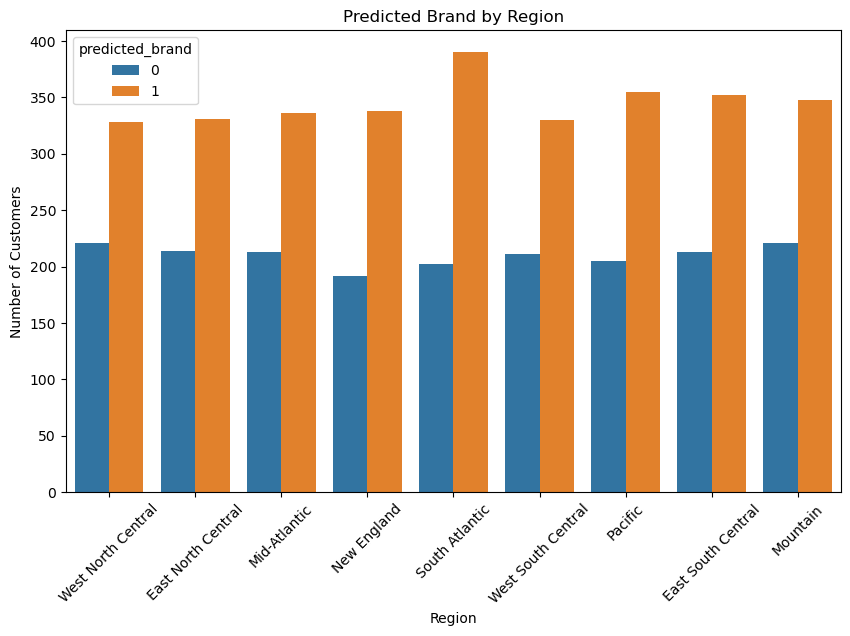

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='region', hue='predicted_brand', data=incomplete)
plt.title("Predicted Brand by Region")
plt.xticks(rotation=45)
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()


### Education vs. Predicted Brand

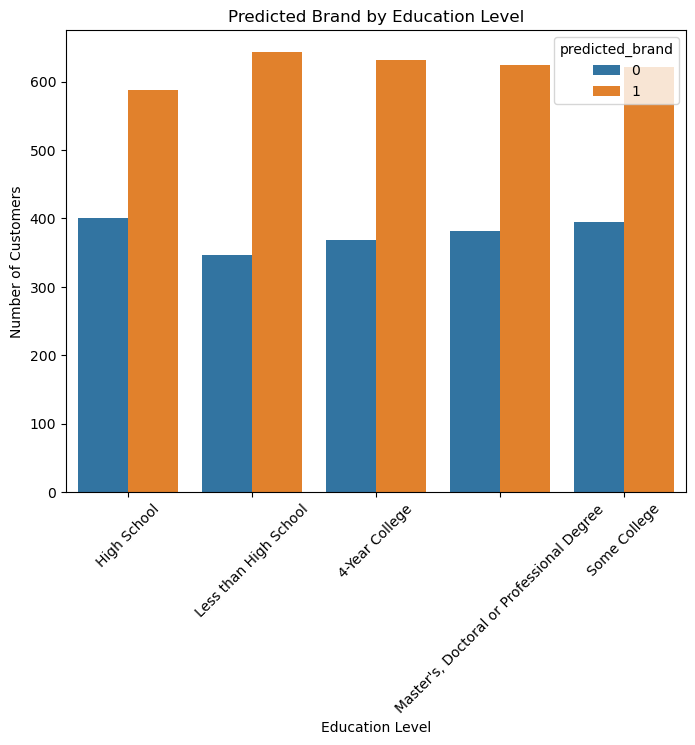

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='elevel_label', hue='predicted_brand', data=incomplete)
plt.title("Predicted Brand by Education Level")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.show()


### Export Summary Table
Shows brand preference by region, useful for regional marketing or strategic planning.

In [34]:
# Summary table of predicted brands by region
summary_region = incomplete.groupby('region')['predicted_brand'].value_counts().unstack().fillna(0)
summary_region['Total'] = summary_region.sum(axis=1)
summary_region['% Acer'] = summary_region[0] / summary_region['Total'] * 100
summary_region['% Sony'] = summary_region[1] / summary_region['Total'] * 100
print(summary_region)

# Save summary to CSV
summary_region.to_csv("PredictedBrand_SummaryByRegion.csv")


predicted_brand       0    1  Total     % Acer     % Sony
region                                                   
East North Central  214  331    545  39.266055  60.733945
East South Central  213  352    565  37.699115  62.300885
Mid-Atlantic        213  336    549  38.797814  61.202186
Mountain            221  348    569  38.840070  61.159930
New England         192  338    530  36.226415  63.773585
Pacific             205  355    560  36.607143  63.392857
South Atlantic      202  390    592  34.121622  65.878378
West North Central  221  328    549  40.255009  59.744991
West South Central  211  330    541  39.001848  60.998152
